In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from scipy.stats import skew
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pd.set_option('display.max_row',81)
pd.set_option('display.max_column',81)

In [3]:
data = r'C:\Users\loris\Desktop\Deep_learning\home-data-for-ml-course\train.csv'
data2 = r'C:\Users\loris\Desktop\Deep_learning\home-data-for-ml-course\test.csv'

dataframe = pd.read_csv(data)
dataframe2 = pd.read_csv(data2)

df_train = dataframe.copy()
df_test = dataframe2.copy()

df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.shape

(1460, 81)

In [5]:
df_test.shape

(1459, 80)

In [6]:
df_test.isna().sum(axis=0)

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType        894
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

# Analyse de la Target 

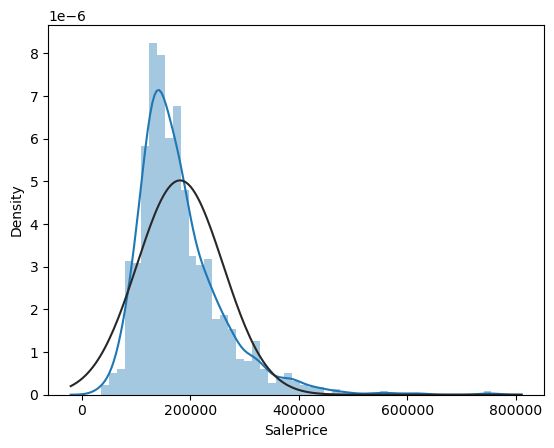

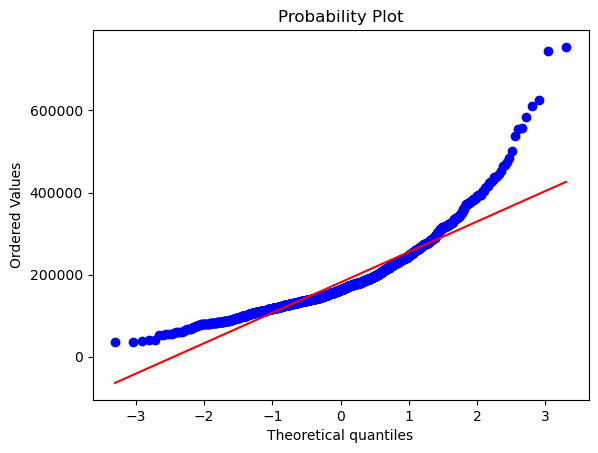

In [7]:
sns.distplot(df_train['SalePrice'], fit=norm)
plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Okey la target semble avoir une distribution qui dévit un peu de la distribution normale, avec une assymétrie (droite). Les valeurs ne sont ni standardiser ni normaliser.
On va pouvoir modifier les données du traint set ensemble pour avoir une meilleur distribution des données. 

In [8]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

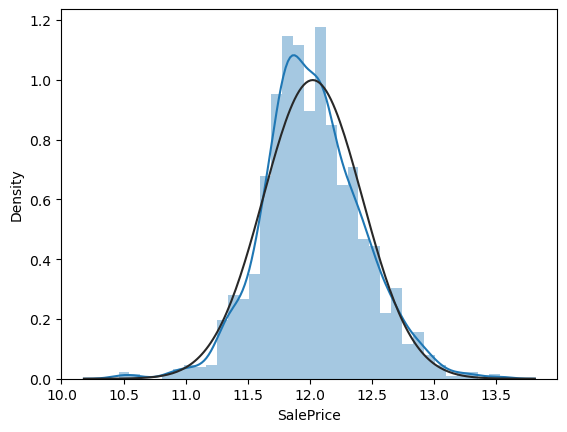

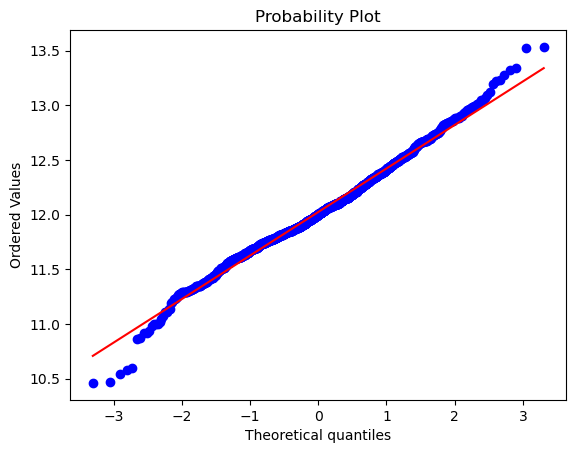

In [9]:
sns.distplot(df_train['SalePrice'], fit=norm)
plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

# Features engineering

let's first concatenate the train and test data in the same dataframe

In [10]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train.SalePrice

In [11]:
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data.drop(['Id'], axis=1, inplace=True)
all_data.shape

(2919, 79)

In [12]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
MasVnrType,60.500171
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageQual,5.447071
GarageCond,5.447071


Text(0.5, 1.0, 'Percent missing data by feature')

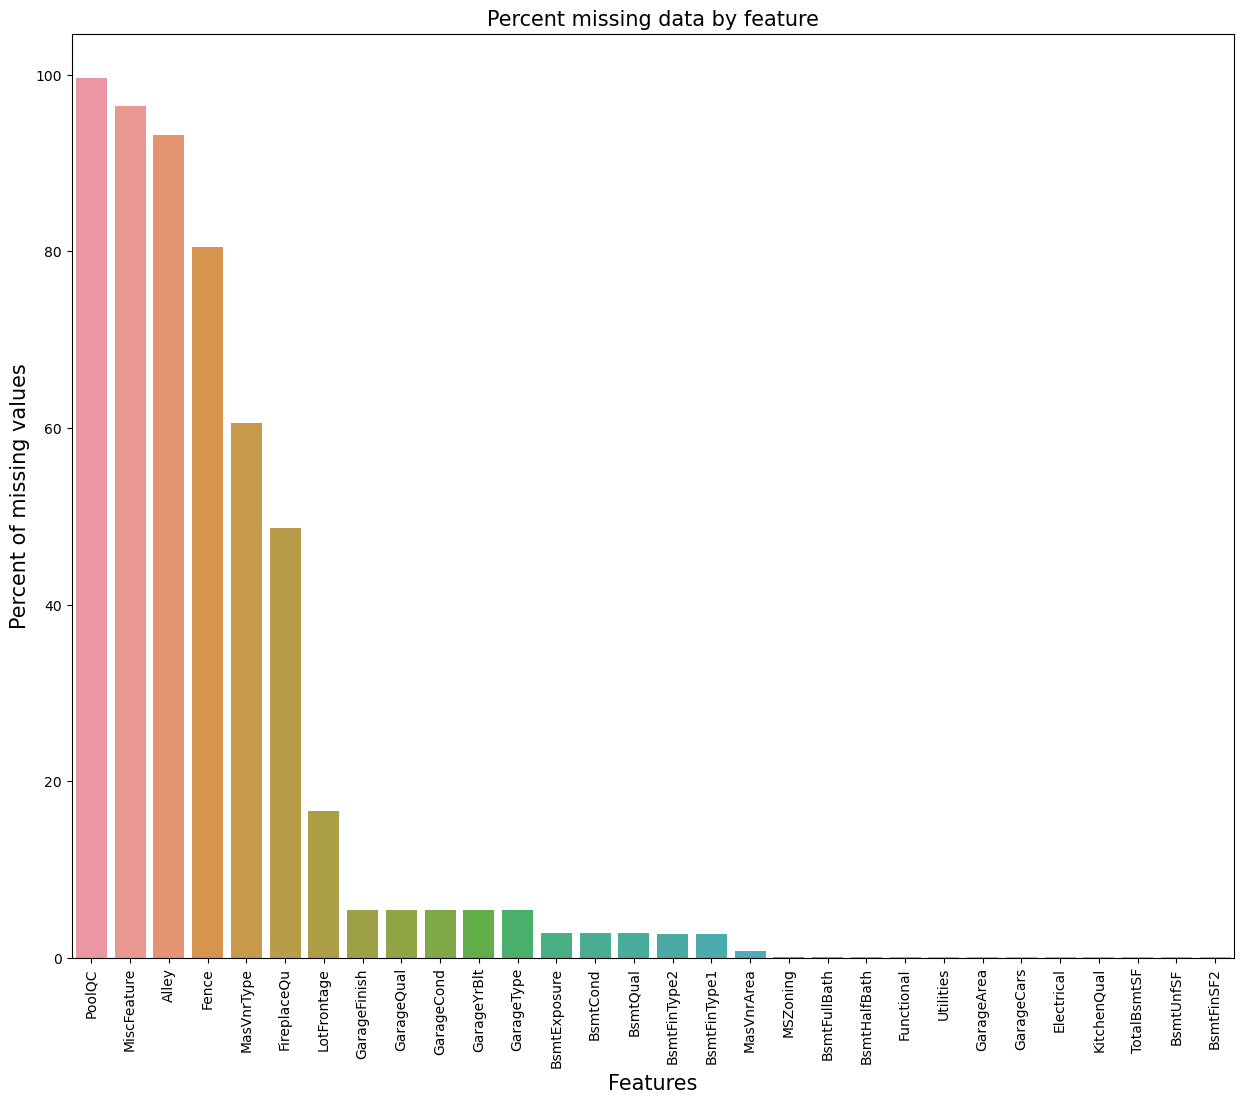

In [13]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

## Imputing missing values

We impute them by proceeding sequentially through features with missing values

PoolQC : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in genera

In [14]:
all_data['PoolQC'] = all_data['PoolQC'].fillna('None')
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.

In [15]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [16]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [17]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [18]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [19]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [20]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [21]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [22]:
all_data = all_data.drop(['Utilities'], axis=1)

In [23]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [24]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [25]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [26]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [27]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [28]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [29]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


## More features engeneering

Transforming some numerical variables that are really categorical

In [30]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

Adding one more important feature

Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house

# Adding total sqfootage feature

In [31]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

# Skewed features

In [32]:
numeric_feats = all_data.dtypes[all_data.dtypes != object].index
# Check the skew of all numerical features

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values()
skewness = pd.DataFrame({'Skew':skewed_feats})
skewness

,Skew
GarageYrBlt,-3.906205
YearBuilt,-0.599806
YearRemodAdd,-0.451020
GarageCars,-0.219581
FullBath,0.167606
OverallQual,0.197110
GarageArea,0.239257
BedroomAbvGr,0.326324
BsmtFullBath,0.624832
HalfBath,0.694566


# Box Cox Transformation of (highly) skewed features

In [33]:
skewness = skewness[abs(skewness)>0.75]

print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15

for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 33 skewed numerical features to Box Cox transform


# Getting the new train and test sets.

In [34]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [35]:
y_train

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [36]:
Data_train = pd.concat([y_train , train], axis=1)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, r2_score
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from xgboost import XGBRegressor

In [38]:
# model

X = Data_train.drop('SalePrice', axis=1)  
y = Data_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


all_cols = all_data.columns
num_col = all_data.select_dtypes(include=np.number).columns
cat_ordinal_col = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold']
cat_nominal_col = list(set(all_cols) - (set(cat_ordinal_col) | set(num_col)))

num_params = make_pipeline(StandardScaler())
cat_ordinal_params = make_pipeline(OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
cat_nominal_params = make_pipeline(OneHotEncoder(drop='if_binary', handle_unknown='ignore'))

preprocessor = make_column_transformer((num_params,num_col), (cat_nominal_params, cat_nominal_col), (cat_ordinal_params, cat_ordinal_col))


In [39]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    print("Root Mean Squared Error:", rmse) 
    
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1,1,10))
    
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label='train_score')
    plt.plot(N, val_score.mean(axis=1), label='validation_score')
    plt.legend()
     


In [40]:
Ridge = make_pipeline(preprocessor, Ridge(random_state=0))
Lasso = make_pipeline(preprocessor, Lasso(random_state=0))
Elast = make_pipeline(preprocessor, ElasticNet(random_state=0))
GradientBR = make_pipeline(preprocessor, GradientBoostingRegressor(random_state=0))
RandomFR = make_pipeline(preprocessor, RandomForestRegressor(random_state=0))
XGB =  make_pipeline(preprocessor, XGBRegressor(random_state=0))                        

In [41]:
list_of_model = {'Ridge':Ridge,
        'Lasso':Lasso,
        'XGB':XGB,
        'Elast':Elast,
        'GradientBR': GradientBR,
        'RandomFR':RandomFR}  

Ridge
Mean Squared Error: 0.02828317900072316
R-squared: 0.8131888471716887
Root Mean Squared Error: 0.16817603575040993
None
Lasso
Mean Squared Error: 0.15141194223641363
R-squared: -7.992313858662392e-05
Root Mean Squared Error: 0.38911687477724943
None
XGB
Mean Squared Error: 0.021298615293448786
R-squared: 0.8593220770368799
Root Mean Squared Error: 0.14594045118968485
None
Elast
Mean Squared Error: 0.15141194223641363
R-squared: -7.992313858662392e-05
Root Mean Squared Error: 0.38911687477724943
None
GradientBR
Mean Squared Error: 0.016371031218411575
R-squared: 0.8918689014830495
Root Mean Squared Error: 0.12794933066808742
None
RandomFR
Mean Squared Error: 0.019478881700025305
R-squared: 0.8713414660319838
Root Mean Squared Error: 0.13956676431022288
None


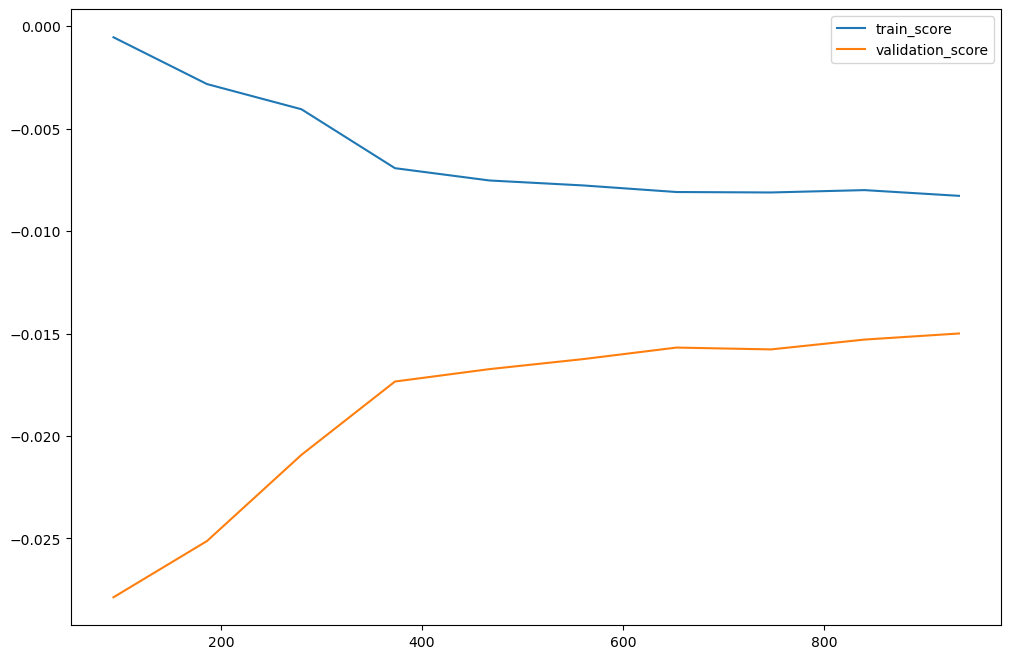

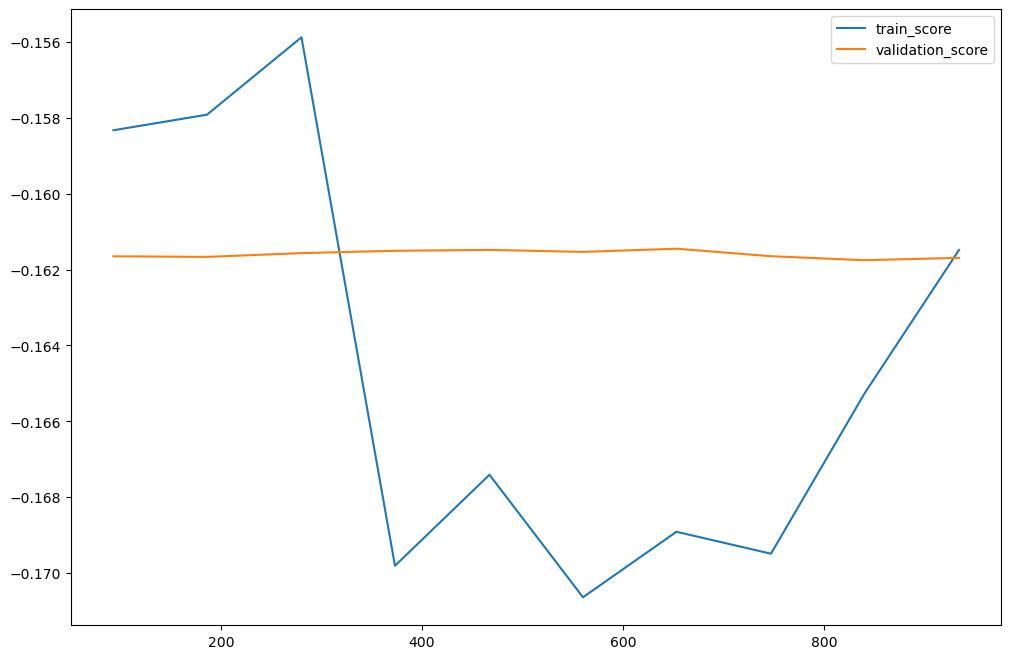

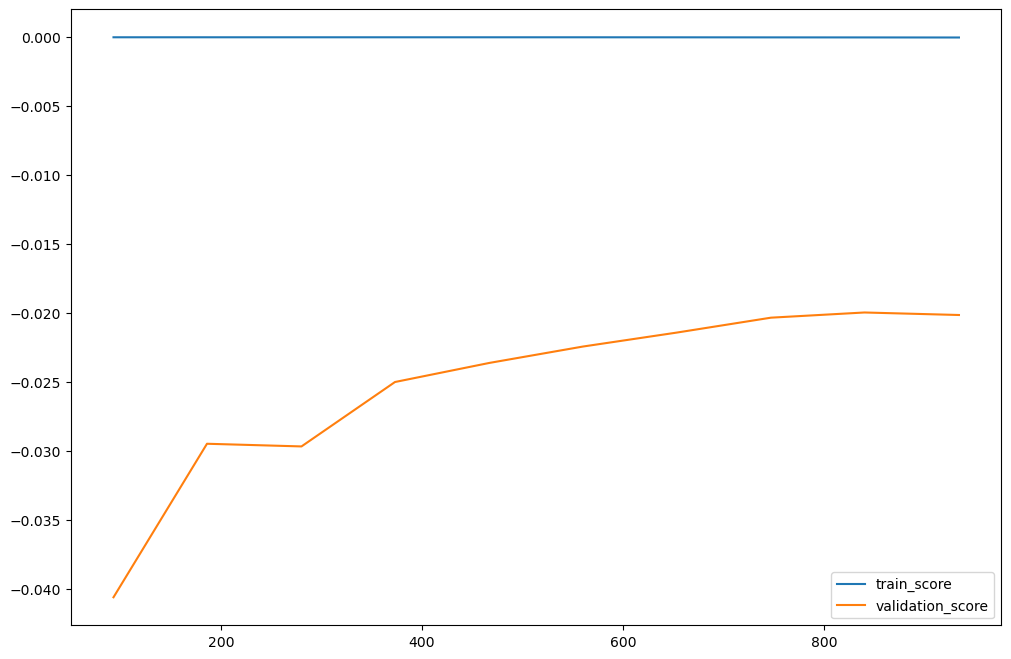

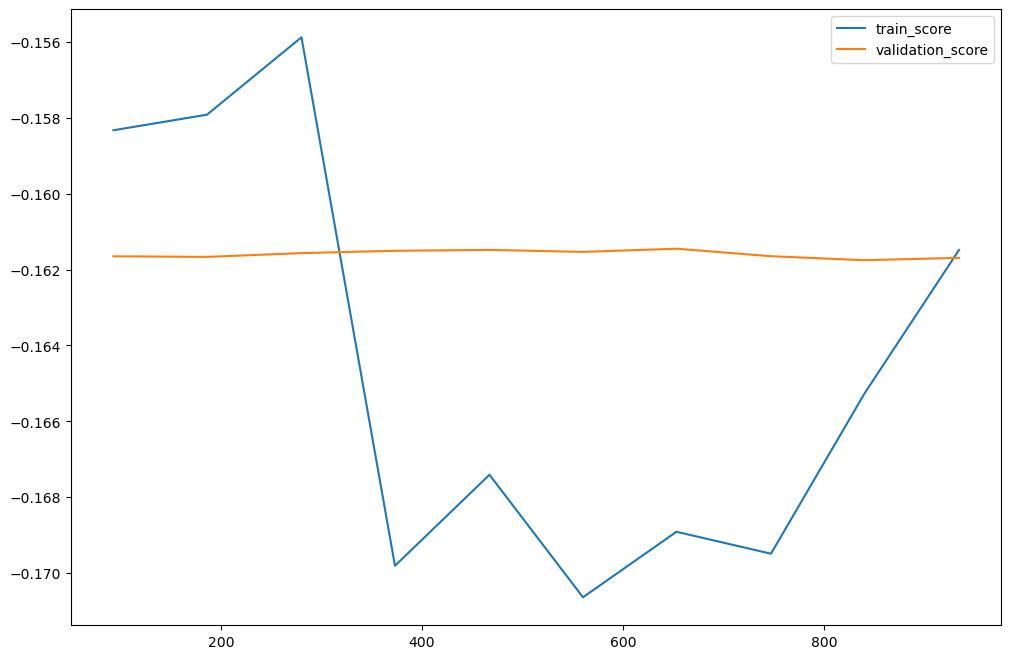

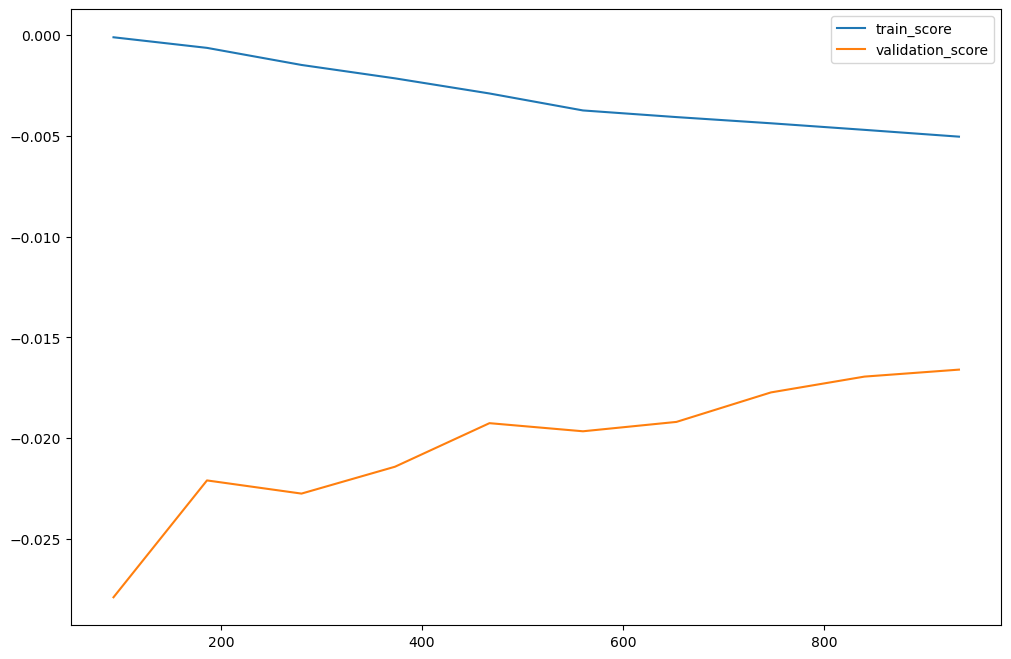

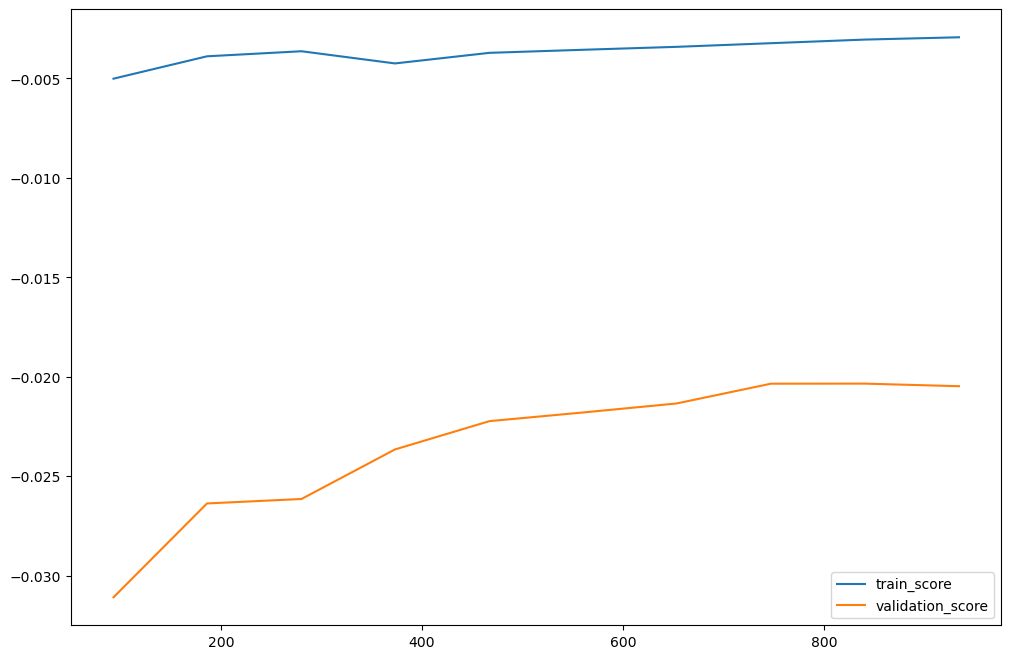

In [42]:
for name, model in list_of_model.items():
    print(name)
    print(evaluation(model))

In [43]:
AdaBoost = make_pipeline(preprocessor, AdaBoostRegressor(random_state=0))
SVM = make_pipeline(preprocessor, SVR())
KNN = make_pipeline(preprocessor, KNeighborsRegressor(n_neighbors=3))

In [44]:
List_of_model = {'AdaBoost': AdaBoost,
                'SVM': SVM,
                'KNN': KNN }

AdaBoost
Mean Squared Error: 0.0316584528667071
R-squared: 0.7908950731231772
Root Mean Squared Error: 0.17792822391826177
None
SVM
Mean Squared Error: 0.01865383307737921
R-squared: 0.8767909342240844
Root Mean Squared Error: 0.13657903600984747
None
KNN
Mean Squared Error: 0.038015068191869346
R-squared: 0.7489094590962211
Root Mean Squared Error: 0.1949745321622015
None


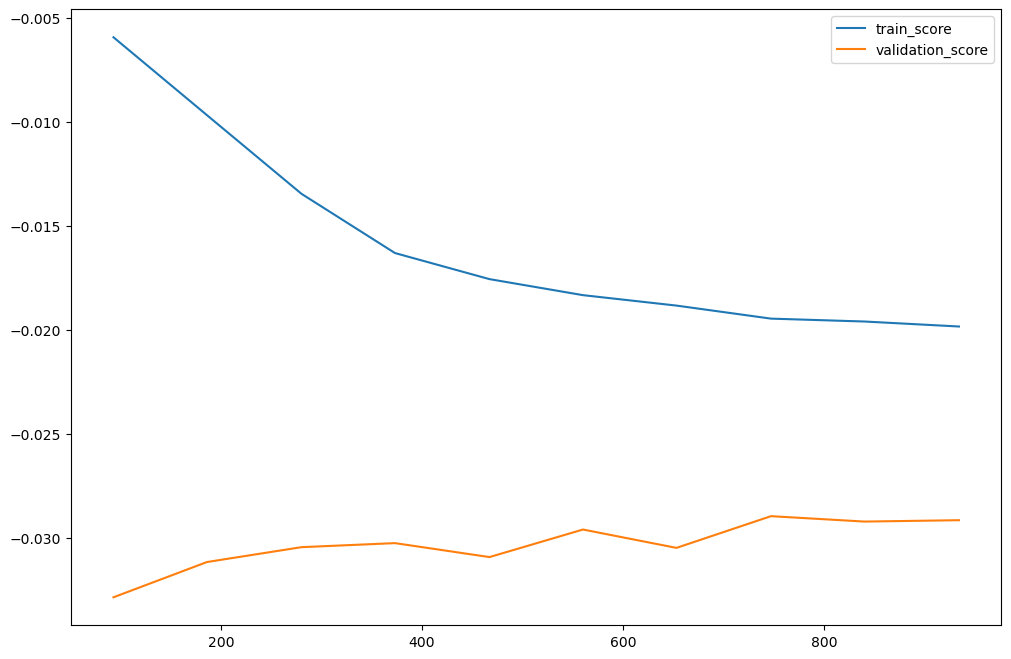

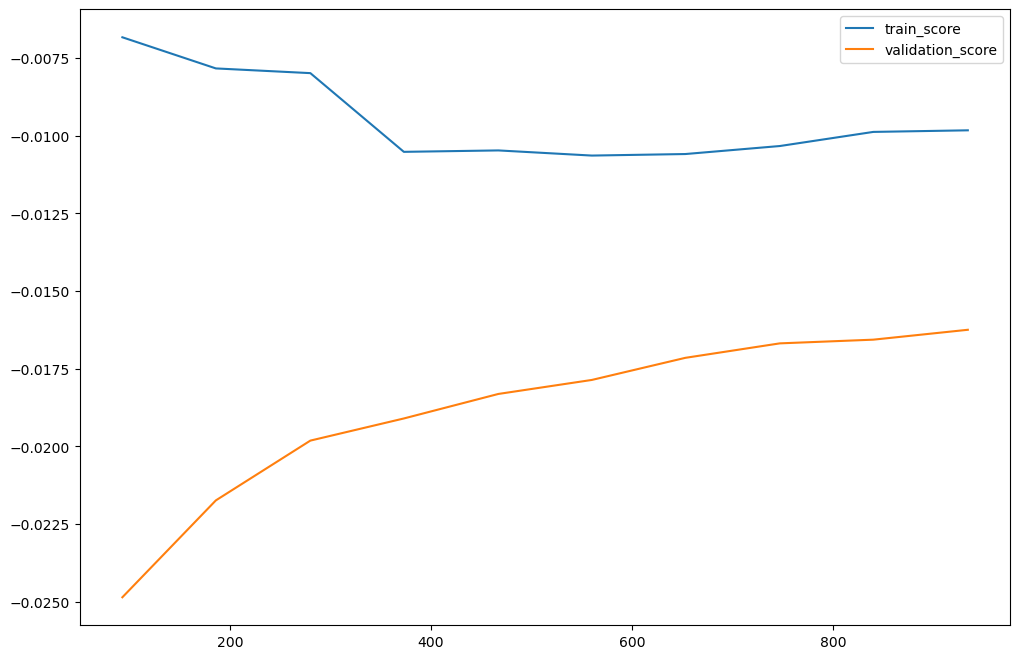

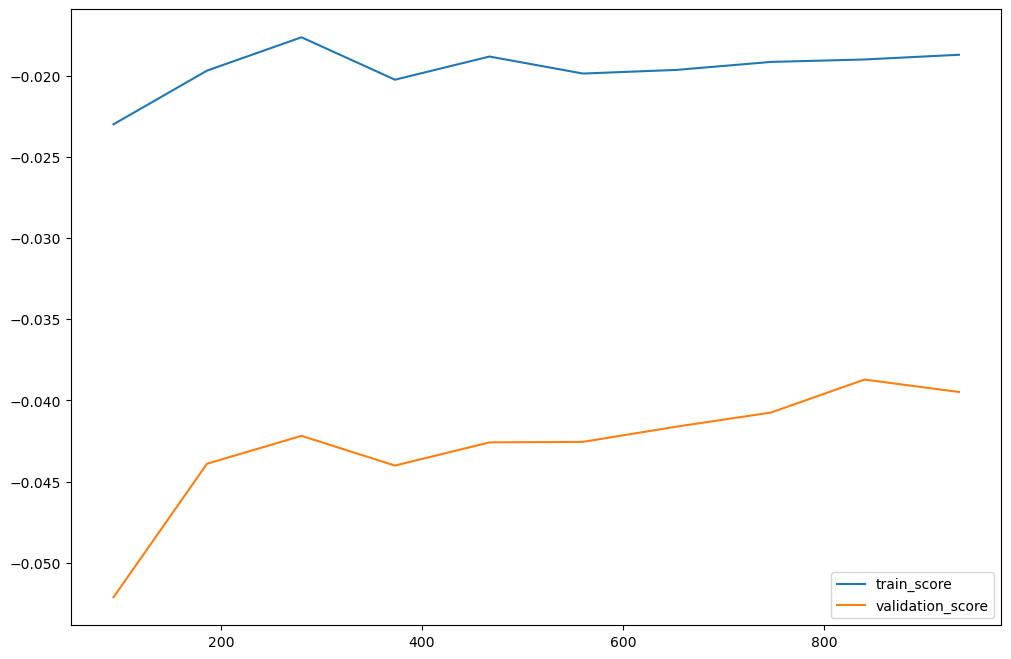

In [45]:
for name, model in List_of_model.items():
    print(name)
    print(evaluation(model))

In [46]:
GradientBR

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBat...
                                                   'BsmtCond', 'GarageQual',
                                                   'GarageCond', 'ExterQual',
                                                   'ExterCond', 'HeatingQC',
                                                   'PoolQC', 'KitchenQual',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Functional',
                                                   'Fence', 'BsmtExposure',
                                                   'GarageFinish', 'LandSlope',
                                                   'LotShape', 'PavedDrive',
                                                   'Street', 'Alley',
                                                   'CentralAir', 'MSSubClass',
                                                   'OverallCond', 'YrSold',
                                                   'MoSold'])])),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=0))])